Total spent by agent: 97656.54 BDT


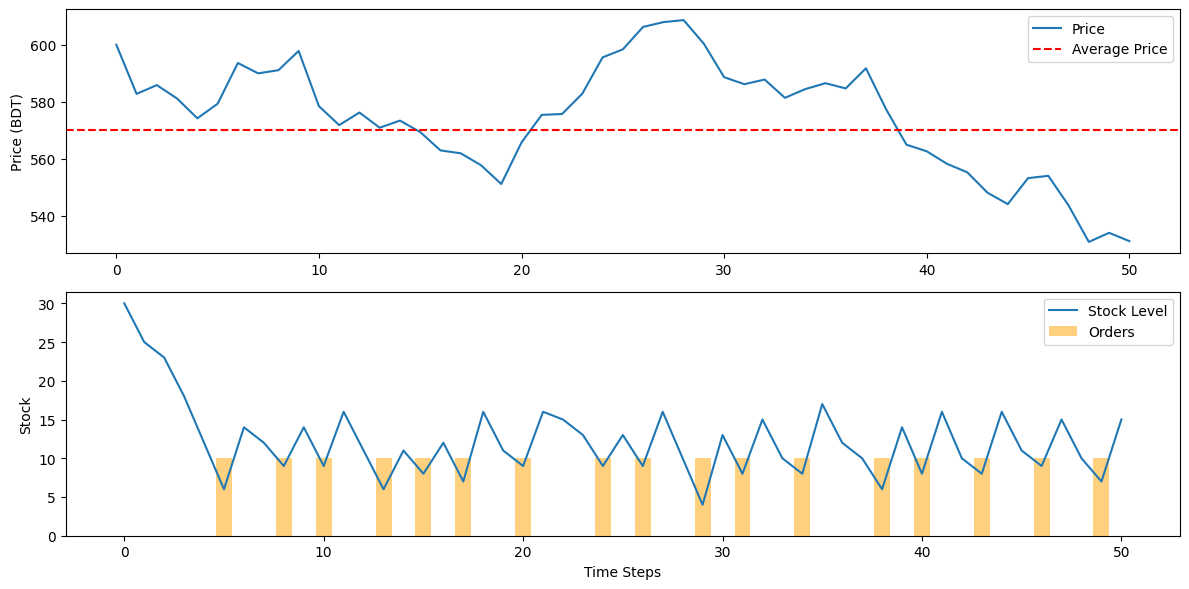

In [3]:
import random
import matplotlib.pyplot as plt


class SmartphoneInventoryEnvironment:
    """Environment to manage smartphone inventory and pricing."""
    noise = 5

    def __init__(self):
        self.time = 0
        self.stock = 30
        self.price = 600
        self.price_history = [self.price]
        self.stock_history = [self.stock]

    def initial_percept(self):
        """Initial percept for the agent."""
        return {"price": self.price, "stock": self.stock}

    def update_environment(self, order_quantity):
        """Simulate the environment after the agent's action."""
        self.stock += order_quantity
        self.stock -= random.randint(1, 6)
        self.stock = max(self.stock, 0)
        self.time += 1


        if self.time % 10 == 0:
            price_change = random.randint(-30, 30)
        else:
            price_change = random.randint(-10, 10)

        self.price += price_change + random.gauss(0, self.noise)
        self.price = max(self.price, 100)
        self.price_history.append(self.price)
        self.stock_history.append(self.stock)
        return {"price": self.price, "stock": self.stock}


class SmartphoneInventoryAgent:
    """Agent to manage smartphone inventory."""
    def __init__(self):
        self.average_price = 600
        self.total_spent = 0
        self.order_history = []

    def decide_action(self, percept):
        """Decide on the action based on percept."""
        price = percept["price"]
        stock = percept["stock"]


        self.average_price += (price - self.average_price) * 0.05


        if price < 0.8 * self.average_price:
            if stock > 10:
                tobuy = 15
            else:
                tobuy = 10
        elif stock < 10:
            tobuy = 10
        else:
            tobuy = 0

        self.total_spent += tobuy * price
        self.order_history.append(tobuy)
        return tobuy


class Simulation:
    """Simulates interaction between the agent and environment."""
    def __init__(self, agent, environment):
        self.agent = agent
        self.environment = environment
        self.history = []

    def run(self, steps):
        """Run the simulation for the given number of steps."""
        percept = self.environment.initial_percept()
        for _ in range(steps):
            action = self.agent.decide_action(percept)
            percept = self.environment.update_environment(action)
            self.history.append((percept, action))

        if len(self.agent.order_history) < len(self.environment.price_history):
            self.agent.order_history.extend([0] * (len(self.environment.price_history) - len(self.agent.order_history)))


class PlotHistory:
    """Plots the history of price and inventory levels."""
    def __init__(self, environment, agent):
        self.environment = environment
        self.agent = agent

    def plot(self):
        """Plot the price and stock levels over time."""
        time_range = range(len(self.environment.price_history))


        plt.figure(figsize=(12, 6))
        plt.subplot(2, 1, 1)
        plt.plot(time_range, self.environment.price_history, label="Price")
        plt.axhline(self.agent.average_price, color="red", linestyle="--", label="Average Price")
        plt.ylabel("Price (BDT)")
        plt.legend()


        plt.subplot(2, 1, 2)
        plt.plot(time_range, self.environment.stock_history, label="Stock Level")
        plt.bar(time_range, self.agent.order_history, alpha=0.5, label="Orders", color="orange")
        plt.xlabel("Time Steps")
        plt.ylabel("Stock")
        plt.legend()

        plt.tight_layout()
        plt.show()


# Main Execution Code
def main():

    environment = SmartphoneInventoryEnvironment()
    agent = SmartphoneInventoryAgent()

    simulation = Simulation(agent, environment)
    simulation.run(50)


    print(f"Total spent by agent: {agent.total_spent:.2f} BDT")


    plotter = PlotHistory(environment, agent)
    plotter.plot()


if __name__ == "__main__":
    main()